In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Colab Notebooks/Data-Analytics-data-2024-2024-1016

Mounted at /gdrive
/gdrive/MyDrive/Colab Notebooks/Data-Analytics-data-2024-2024-1016


# Comparing classification models




In [3]:
### Importing the basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
### Importing more libraries

### train_test_split can split data into train data and test data

from sklearn.model_selection import train_test_split

### Models used

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Assessing the accuracy of the models

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

### This is required in older versions
#from sklearn.metrics import plot_confusion_matrix

### For drawing the decision tree

from sklearn.tree import plot_tree

%matplotlib inline


## Data Review

In [5]:
### Opening the data in a dataframe

df = pd.read_excel('wine.xlsx')

### View the basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       178 non-null    int64  
 1   X1      178 non-null    float64
 2   X2      178 non-null    float64
 3   X3      178 non-null    float64
 4   X4      178 non-null    float64
 5   X5      178 non-null    int64  
 6   X6      178 non-null    float64
 7   X7      178 non-null    float64
 8   X8      178 non-null    float64
 9   X9      178 non-null    float64
 10  X10     178 non-null    float64
 11  X11     178 non-null    float64
 12  X12     178 non-null    float64
 13  X13     178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
## print data

df

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


The variable to be predicted in this analysis is **Y**, which is class


In [7]:
### Let's have a look at the distribution of the values of the target variable.

df['Y'].value_counts()

,count
Y,
2,71
1,59
3,48


<Axes: >

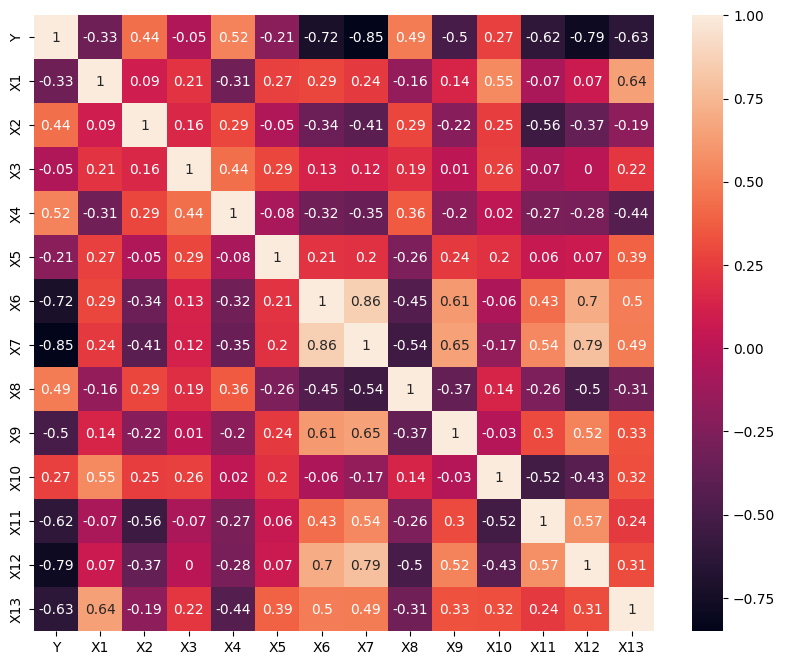

In [8]:
### Correlations

plt.figure(figsize = (10, 8))
sns.heatmap(df.corr().round(2), annot = True)

Select the independent variables that have the highest correlations with the predicted (dependent) variable.

**X6, X7, X12 and X4** as they have highest correlations (-0.72, -0.85, -0.79, 0.52)

<Axes: xlabel='Y', ylabel='X4'>

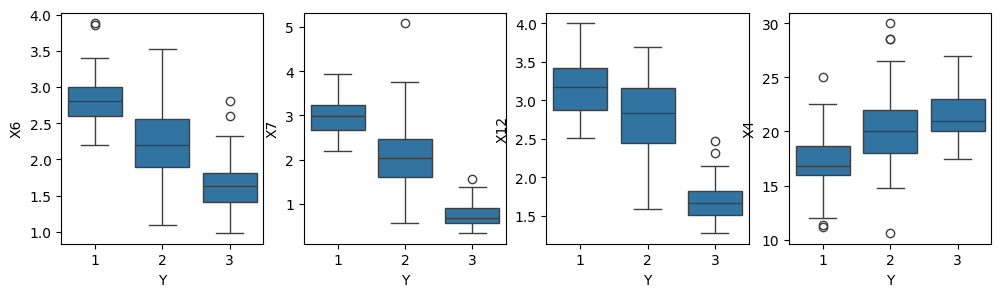

In [9]:
### Let's see how well the variables with the highest correlation distinguish among class 1, 2, and 3.

fig, axes = plt.subplots(1, 4, figsize = (12,3))

sns.boxplot(x = 'Y', y = 'X6', data = df, ax = axes[0])
sns.boxplot(x = 'Y', y = 'X7', data = df, ax = axes[1])
sns.boxplot(x = 'Y', y = 'X12', data = df, ax = axes[2])
sns.boxplot(x = 'Y', y = 'X4', data = df, ax = axes[3])

The box plots for the selected variables (X6, X7, X12, X4) show significant overlap between the different classes (1, 2, 3). This indicates that while these variables might contribute to the classification, they are not strong discriminators individually. To improve the classification accuracy, it's likely that a combination of multiple variables will be necessary.

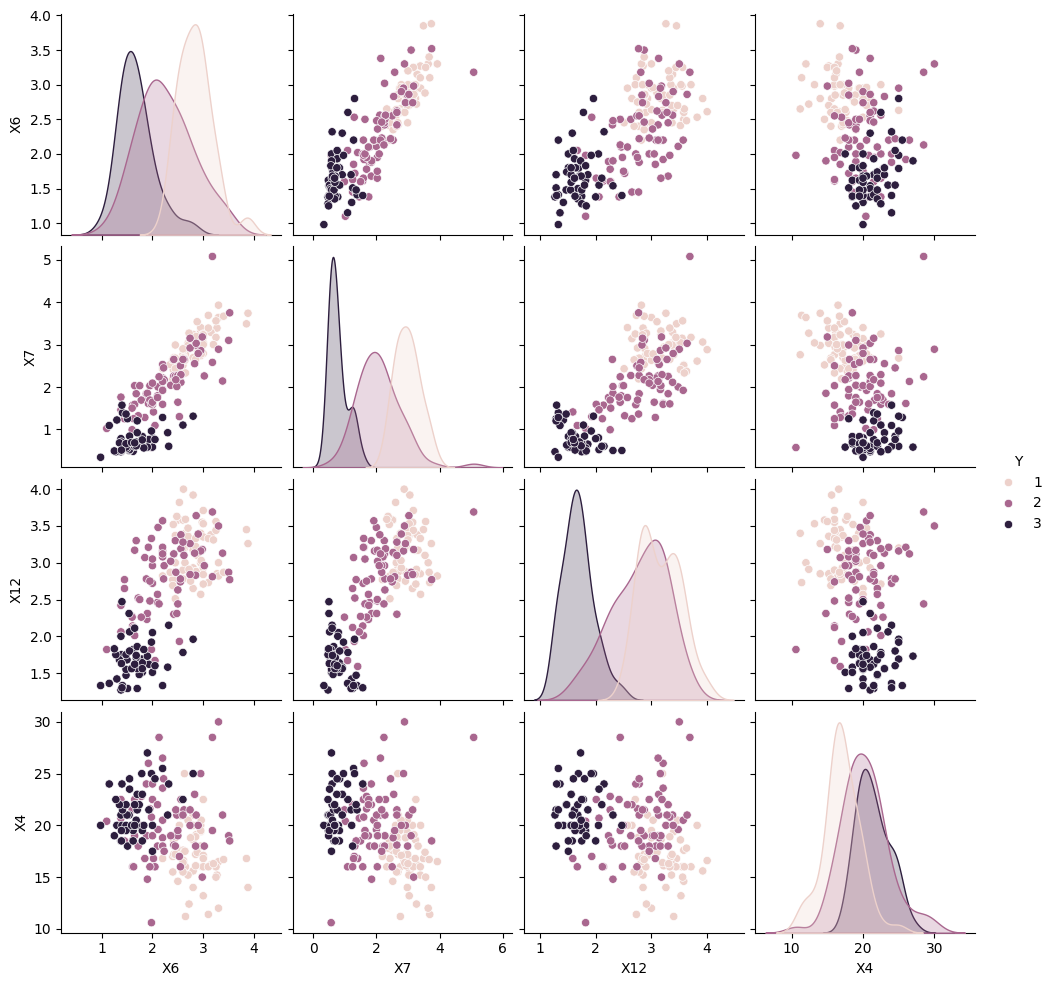

In [10]:
### Let's see distinctiveness also as scatter charts.

sns.pairplot(df[['X6', 'X7', 'X12', 'X4', 'Y']], hue = 'Y')

The pair plot suggests 'X6', 'X7', and 'X12' are **relatively good** features for classifying wine, but a combination of variables is likely needed for better accuracy. 'X4' might be less informative.

## Model fitting

In [11]:
### Independent variables

X = df[['X5', 'X7', 'X12', 'X4']]

### The predicted variable

y = df['Y']

### Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

In [12]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

model2 = DecisionTreeClassifier(max_depth = 4, random_state = 2)
model2.fit(X_train, y_train)

model3 = RandomForestClassifier(max_depth = 3, random_state = 2)
model3.fit(X_train, y_train)

model4 = GradientBoostingClassifier(max_depth = 3, random_state = 2)
model4.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier(random_state=2)

## Accuracy of models

In [13]:
### Calculation of predictions according to the model for train data and test data

y_train_model1 = model1.predict(X_train)
y_test_model1 = model1.predict(X_test)

y_train_model2 = model2.predict(X_train)
y_test_model2 = model2.predict(X_test)

y_train_model3 = model3.predict(X_train)
y_test_model3 = model3.predict(X_test)

y_train_model4 = model4.predict(X_train)
y_test_model4 = model4.predict(X_test)


In [14]:
### Proportion of correct predictions in the train data

print('Accuracy of predictions in the train data:')
print(f'Logistic Regression {accuracy_score(y_train, y_train_model1):.3f}')
print(f'Decision Tree {accuracy_score(y_train, y_train_model2):.3f}')
print(f'Random Forest {accuracy_score(y_train, y_train_model3):.3f}')
print(f'Gradient Boosting {accuracy_score(y_train, y_train_model4):.3f}')

Accuracy of predictions in the train data:
Logistic Regression 0.895
Decision Tree 0.970
Random Forest 0.955
Gradient Boosting 1.000


The training data results indicate that Gradient Boosting achieved perfect accuracy (100%), suggesting it captured the patterns in the data exceptionally well. Decision Tree and Random Forest also performed strongly, with accuracies of 97% and 95.5%, respectively, while Logistic Regression achieved a solid but comparatively lower accuracy of 89.5%.

In [16]:
### Proportion of correct predictions in the test data

print('Accuracy of predictions in the test data:')
print(f'Logistic Regression {accuracy_score(y_test, y_test_model1):.3f}')
print(f'Decision Tree {accuracy_score(y_test, y_test_model2):.3f}')
print(f'Random Forest {accuracy_score(y_test, y_test_model3):.3f}')
print(f'Gradient Boosting {accuracy_score(y_test, y_test_model4):.3f}')

Accuracy of predictions in the test data:
Logistic Regression 0.867
Decision Tree 0.822
Random Forest 0.844
Gradient Boosting 0.889


All models generally demonstrate **good performance**, with test accuracies ranging from 0.822 to 0.889.

Let's have a look at the confusion matrix of the Gradient Boosting


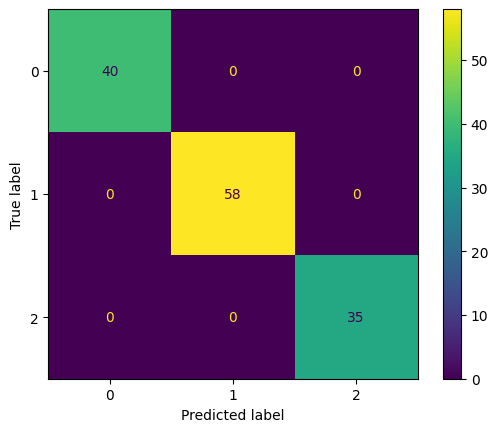

In [17]:
cm = confusion_matrix(y_train, y_train_model4)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


The confusion matrix suggests that the model has performed perfectly on train data. It has correctly classified all samples into their respective classes, resulting in **zero misclassifications**.

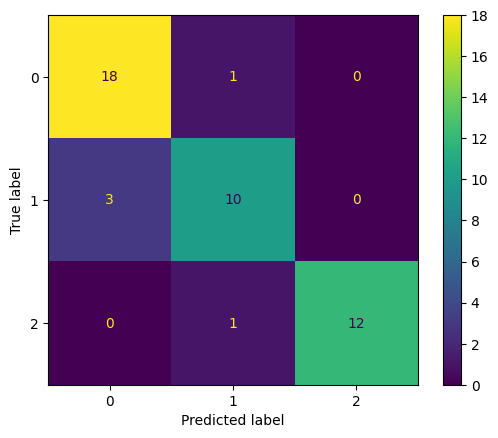

In [18]:
# the confusion matrix applied to the test data

cm = confusion_matrix(y_test, y_test_model4)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


The confusion matrix shows the classification model can distinguish reasonably well between the three wine classes.

1.   Class 0 (**Wine Type 1**): The model performs very well, with only 1 misclassification out of 19 samples. This could mean that chemical features for this wine type are more distinct compared to others.

2.   Class 1 (**Wine Type 2**): The model struggles slightly, with 3 samples being misclassified as Class 0. This suggests some overlap in feature values between these wine types (e.g., similarities in Alcohol, Malic Acid, or Flavanoids).

3. Class 2 (**Wine Type 3**): The model performs well for this class, with just 1 misclassification as Class 1.





In [18]:
### Classification report for the test data (Gradient Boosting)

print(classification_report(y_test, y_test_model4))2

              precision    recall  f1-score   support

           1       0.86      0.95      0.90        19
           2       0.83      0.77      0.80        13
           3       1.00      0.92      0.96        13

    accuracy                           0.89        45
   macro avg       0.90      0.88      0.89        45
weighted avg       0.89      0.89      0.89        45



There are a total of 45 samples.

Of these 18+10+12 were correctly predicted: accuracy (18+10+12)/45 = 0.89 = **89%**


1.   **Precision for 0**: The model predicted 18+3 = 21 samples as Class 1, of which 18/21 = 0.86 = **86%** were correctly predicted.

2.  **Precision for 1**: The model predicted 10+3 = 13 samples as Class 2, of which 10/13 = 0.83 = **83%** were correctly predicted.

3.   **Precision for 2**: The model predicted 12+1 = 13 samples as Class 3, of which 12/13 = 1.00 = **100%** were correctly predicted.



The accuracy of 89% is a strong result for this classification task. The model performs especially well for Class 1 and Class 3, with high precision and recall values. While the performance for Class 2 is slightly lower, it remains acceptable.

[Text(0.39285714285714285, 0.9, 'x[1] <= 1.235\ngini = 0.65\nsamples = 133\nvalue = [40, 58, 35]'),
 Text(0.14285714285714285, 0.7, 'x[3] <= 16.75\ngini = 0.193\nsamples = 37\nvalue = [0, 4, 33]'),
 Text(0.26785714285714285, 0.8, 'True  '),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.21428571428571427, 0.5, 'x[0] <= 127.0\ngini = 0.108\nsamples = 35\nvalue = [0, 2, 33]'),
 Text(0.14285714285714285, 0.3, 'x[1] <= 0.99\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.07142857142857142, 0.1, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]'),
 Text(0.21428571428571427, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.6428571428571429, 0.7, 'x[1] <= 2.35\ngini = 0.51\nsamples = 96\nvalue = [40, 54, 2]'),
 Text(0.5178571428571429, 0.8, '  False'),
 Text(0.5, 0.5, 'x[2] <= 1.46\ngini = 0.138\nsamples = 41\nvalue = [1, 38, 2]'),
 Text(0.42857142857142855

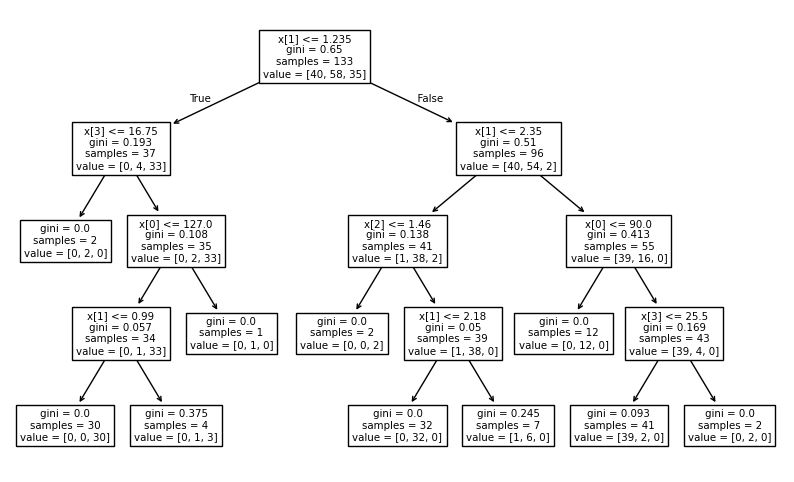

In [19]:
### Let's reserve some space for the figure.

plt.figure(figsize = (10,6))

### Decision tree of the train data.

plot_tree(model2)

# Key Findings



1.  Gradient Boosting demonstrated the highest accuracy on both training and test data, achieving nearly perfect classification on the training set.

2.   Decision Tree and Random Forest also showed promising results, with slightly lower accuracy but offering greater interpretability.



Gradient Boosting emerged as the most accurate model for this classification task. However, the Decision Tree provided valuable insights into the decision-making process and feature importance.